# PICKLE TESTER

In [1]:
import re
import pickle
from nltk import WordNetLemmatizer
import pandas as pd

In [2]:
# Load in CSV and preview
hoteldf = pd.read_csv("dataset/HR_EDA.csv", index_col=0)

In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ["hotel", "hotels", "everything", "could", "would", "the", "and", "were", "are", "is", "was", "a", "very", "positive", "negative"]  # to add on more stopwords

In [11]:
# load the model from disk
pipeline = pickle.load(open("model/pipeline.mod", 'rb'))
lr = pickle.load(open("model/logreg.mod", 'rb'))

In [5]:
# Output Tester
def detector(text):
    lemmatizer = WordNetLemmatizer()
    text = re.sub('[^a-z\s]', '', text.lower())
    text = [" ".join([lemmatizer.lemmatize(i.lower()) for i in text.split()])]
    text = pipeline.transform(text)
    print(lr.predict_proba(text)[0])
    if lr.predict(text)[0] > 0:
        print("Positive Comment!")
    else:
        print("Negative Comment!")

In [6]:
detector("the hotel is very far away, cannot wait for the bus.")

[0.96964941 0.03035059]
Negative Comment!


In [7]:
detector("hotel is not very clean, but interesting")

[0.07985833 0.92014167]
Positive Comment!


In [8]:
detector("Easy to reach Covent Garden Soho and City. However the hotel is quite far away from Westminster. Room is clean comfy and nicely designed. Very nice couch good bath.")

[0.17229383 0.82770617]
Positive Comment!


In [9]:
tttfff = ["the room is small but clean!",
          "the swimming pool is dirty and the staff are rude.",
          "the breakfast was good."]

In [10]:
for i in tttfff:
    detector(i)

[0.97563754 0.02436246]
Negative Comment!
[0.98459724 0.01540276]
Negative Comment!
[0.42506106 0.57493894]
Positive Comment!


### Using WordCloud to present comments

In [11]:
from wordcloud import WordCloud
import re
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
def preprocess(x):
    
    '''
    Processes a string to remove any special characters & transforming to lowercase.
    
    Keyword arguments:
    x  --  Text String
    
    '''
    
    x = re.sub('[^a-z\s]', '', x.lower()) # get rid of noise
    x = [w for w in x.split() if w not in set(stop)] # remove stopwords
    return ' '.join(x) # then join the text again

In [13]:
def freq_words(document):
    cvec = pipeline.get_params()["vect"]
    sum_words = cvec.transform(document).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [14]:
def takeSecond(elem):
    return elem[1]

In [15]:
# Function to check reviews of specific hotel
def wordcloud_hotel(hotelname_var, displaycount=False):
    
    '''
    Generates two WordClouds for a specific Hotel, consisting of Negative Keywords and Positive Keywords.
    
    Keyword arguments:
    hotelname_var  --  insert Hotel Name as String
    displaycount   -- displays Top 5 Keywords for both Negative and Positive reviews
    
    '''
    
    # limit scope of reviews
    df3 = hoteldf[hoteldf["Hotel_Name"] == hotelname_var][["Negative_Review", "Positive_Review"]]
    negdoc = df3["Negative_Review"].apply(preprocess)
    posdoc = df3["Positive_Review"].apply(preprocess)
    
    # declare our figure 
    plt.subplots(1, 2, figsize=(28,10))
    
    # Negative Words WordCloud
    plt.subplot(121, facecolor='yellow')
    # Generate WordCloud
    wc = WordCloud(width=1600, height=800, random_state=93, max_words=2000, background_color="white")
    wc.generate(str(negdoc))
    # add title to the graph
    plt.title("Negative Keywords about {}".format(hotelname_var), fontsize=30, color='black')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=10)

    # Positive Words WordCloud
    plt.subplot(122, facecolor='blue')
    wc = WordCloud(width=1600, height=800, random_state=93, max_words=2000, background_color="white")
    # Generate WordCloud
    wc.generate(str(posdoc))
    # Add Title
    plt.title("Positive Keywords about {}".format(hotelname_var), fontsize=30, color='black')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=2)
    plt.show()
    
    if displaycount == True:
        # Generate Keywords Frequency
        print("Top 5 Negative Words:", sorted(freq_words(negdoc), key=takeSecond, reverse=True)[0:5])
        print("Top 5 Positive Words:", sorted(freq_words(posdoc), key=takeSecond, reverse=True)[0:5])

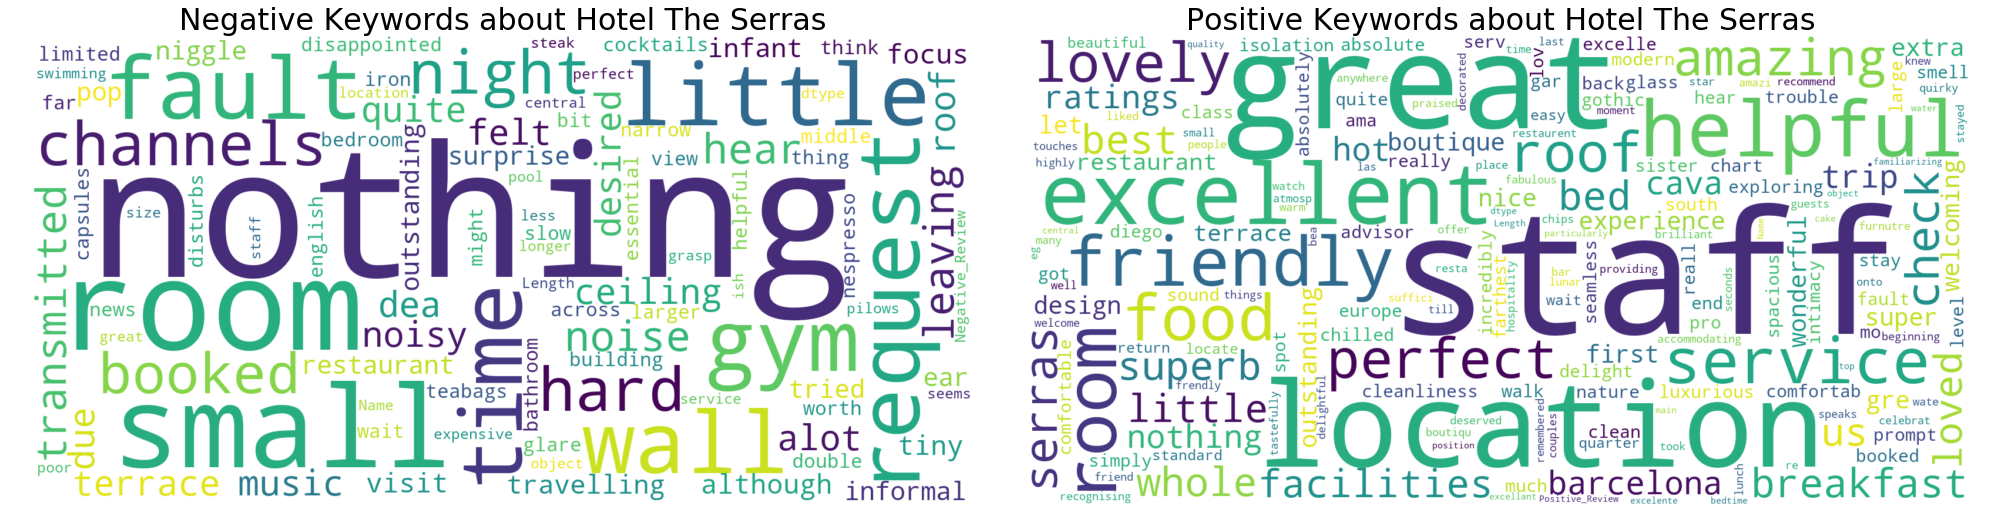

Top 5 Negative Words: [('nothing', 33), ('room', 26), ('small', 15), ('bit', 14), ('pool', 8)]
Top 5 Positive Words: [('staff', 150), ('location', 85), ('great', 80), ('excellent', 54), ('friendly', 49)]


In [16]:
wordcloud_hotel("Hotel The Serras", True)

In [17]:
# Function to check reviews of hotel in the state in general
def wordcloud_state(hotelstate_var, displaycount=False):
    
    '''
    Generates two WordClouds for a specific state, consisting of Negative Keywords and Positive Keywords.
    
    Keyword arguments:
    hotelstate_var  -- insert State Name as String
    displaycount    -- displays Top 5 Keywords for both Negative and Positive reviews
    
    '''
    
    # Check if State is present in the data
    if hotelstate_var.capitalize() not in hoteldf["Hotel_State"].unique():
        print("SelectionError: Please select from the following States -", " / ".join(hoteldf["Hotel_State"].unique().tolist()))
    else:
        # limit scope of reviews
        df3 = hoteldf[hoteldf["Hotel_State"] == hotelstate_var.capitalize()][["Negative_Review", "Positive_Review"]]
        negdoc = df3["Negative_Review"].apply(preprocess)
        posdoc = df3["Positive_Review"].apply(preprocess)

        # declare our figure 
        plt.subplots(1, 2, figsize=(25,10))

        # Negative Words WordCloud
        plt.subplot(121, facecolor='yellow')
        # Generate WordCloud
        wc = WordCloud(width=1600, height=800, random_state=93, max_words=2000, background_color="white")
        wc.generate(str(negdoc))
        # add title to the graph
        plt.title("Negative Keywords about hotels in {}".format(hotelstate_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=10)

        # Positive Words WordCloud
        plt.subplot(122, facecolor='blue')
        wc = WordCloud(width=1600, height=800, random_state=93, max_words=2000, background_color="white")
        # Generate WordCloud
        wc.generate(str(posdoc))
        # Add Title
        plt.title("Positive Keywords about hotels in {}".format(hotelstate_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=4)
        plt.show()
        
        if displaycount == True:
            # Generate Keywords Frequency
            print("Top 5 Negative Words:", sorted(freq_words(negdoc), key=takeSecond, reverse=True)[0:5])
            print("Top 5 Positive Words:", sorted(freq_words(posdoc), key=takeSecond, reverse=True)[0:5])

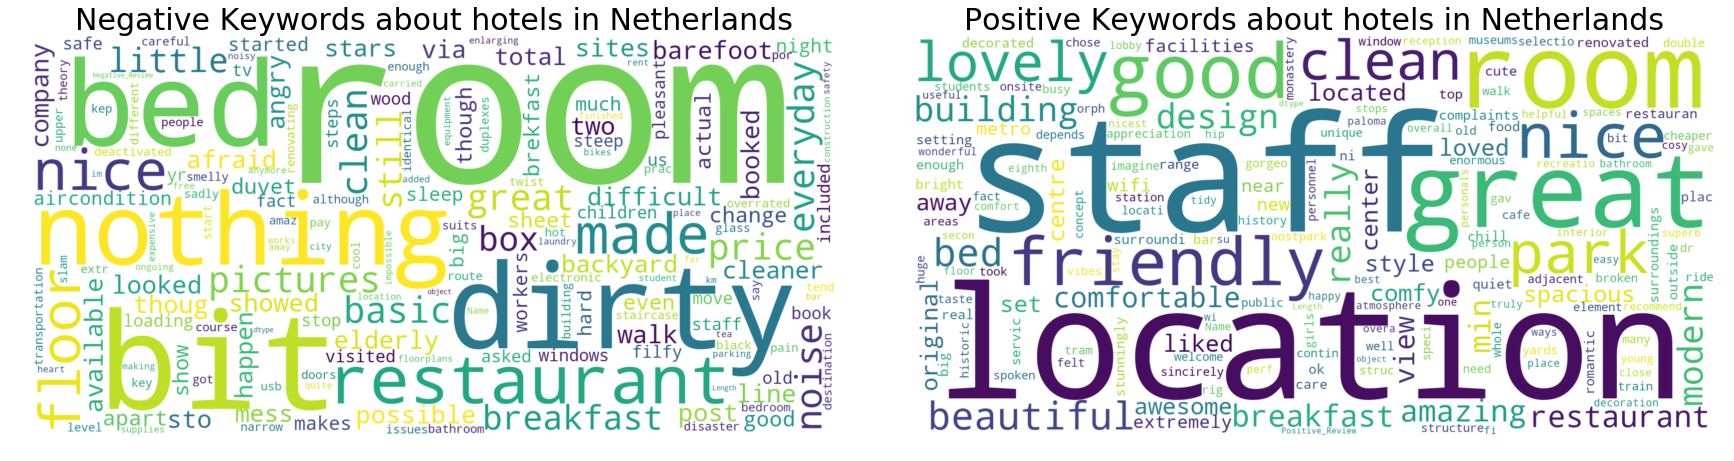

Top 5 Negative Words: [('room', 18029), ('breakfast', 5730), ('staff', 4399), ('nothing', 4343), ('small', 3629)]
Top 5 Positive Words: [('staff', 21968), ('location', 18607), ('room', 15835), ('great', 12628), ('good', 11555)]


In [18]:
wordcloud_state("netherlands", True)

In [19]:
# Function to check reviews of hotel in the state in general
def wordcloud_origin(origin_var, displaycount=False, n=5):
    
    '''
    Generates two WordClouds for reviews from a specific country, consisting of Negative Keywords and Positive Keywords.
    
    Keyword arguments:
    hotelstate_var  -- insert Country Name as String
    displaycount    -- displays Top 5 Keywords for both Negative and Positive reviews
    
    '''
    
    # Check if State is present in the data
    if origin_var.lower() not in hoteldf["Reviewer_Nationality"].apply(preprocess).unique():
        print("SelectionError: Please select from the following States -", " / ".join(hoteldf["Reviewer_Nationality"].apply(preprocess).unique().tolist()))
    else:
        # limit scope of reviews
        df3 = hoteldf[hoteldf["Reviewer_Nationality"].apply(preprocess) == origin_var.lower()][["Negative_Review", "Positive_Review"]]
        negdoc = df3["Negative_Review"].apply(preprocess)
        posdoc = df3["Positive_Review"].apply(preprocess)

        # declare our figure 
        plt.subplots(1, 2, figsize=(25,10))

        # Negative Words WordCloud
        plt.subplot(121, facecolor='yellow')
        # Generate WordCloud
        wc = WordCloud(width=1600, height=800, random_state=93, max_words=2000, background_color="white")
        wc.generate(str(negdoc))
        # add title to the graph
        plt.title("Negative Keywords by Guests from {}".format(origin_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=10)

        # Positive Words WordCloud
        plt.subplot(122, facecolor='blue')
        wc = WordCloud(width=1600, height=800, random_state=93, max_words=2000, background_color="white")
        # Generate WordCloud
        wc.generate(str(posdoc))
        # Add Title
        plt.title("Positive Keywords by Guests from {}".format(origin_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=4)
        plt.show()
        
        if displaycount == True:
            # Generate Keywords Frequency
            print("Top {} Negative Words:".format(n), sorted(freq_words(negdoc), key=takeSecond, reverse=True)[0:n])
            print("Top {} Positive Words:".format(n), sorted(freq_words(posdoc), key=takeSecond, reverse=True)[0:n])

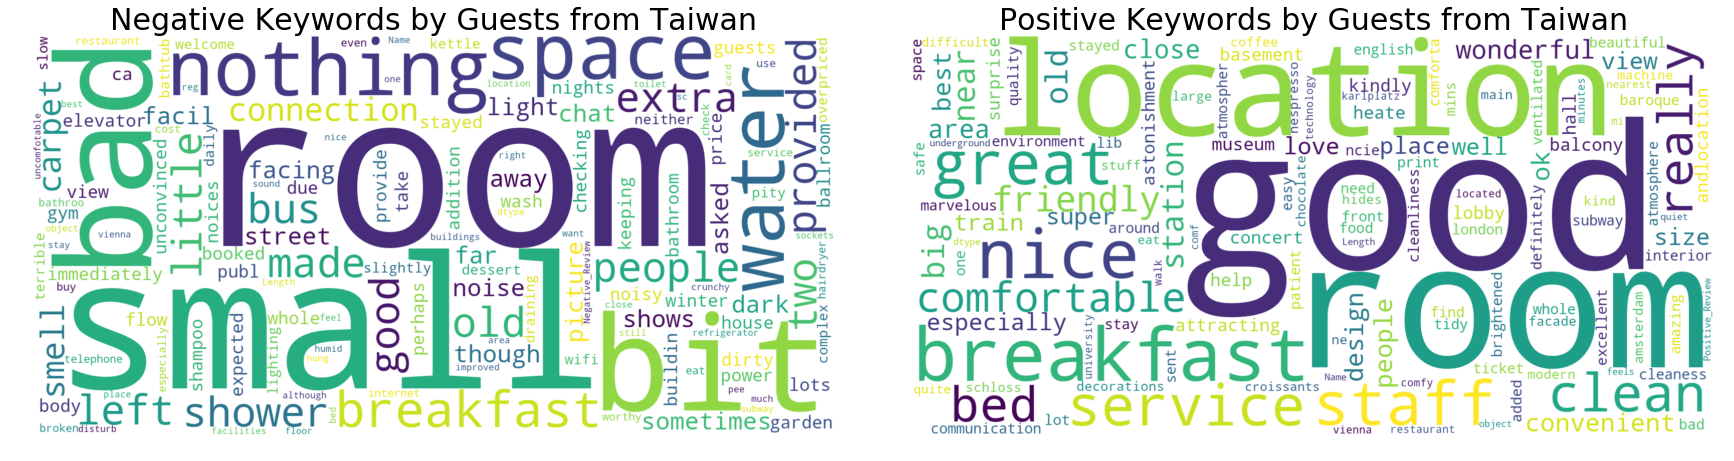

Top 5 Negative Words: [('room', 261), ('small', 75), ('breakfast', 56), ('water', 55), ('bit', 54)]
Top 5 Positive Words: [('location', 385), ('room', 264), ('good', 263), ('breakfast', 219), ('staff', 196)]


In [20]:
wordcloud_origin("Taiwan", True)

In [21]:
hoteldf["Hotel_Name"].drop_duplicates()

0                                          Hotel Arena
405                                   K K Hotel George
971                            Apex Temple Court Hotel
2008                  The Park Grand London Paddington
3778                               Monhotel Lounge SPA
3813                                Kube Hotel Ice Bar
3832                              The Principal London
5257                     Park Plaza County Hall London
7480                                       One Aldwych
7616                                   Splendid Etoile
7743                         Hotel Trianon Rive Gauche
7961                 InterContinental London Park Lane
8121                   Novotel Suites Paris Nord 18 me
8301                     Grand Royale London Hyde Park
11259                       Milestone Hotel Kensington
11345                  Crowne Plaza London Kings Cross
12352                                     Select Hotel
12608                                 H tel De Vend me
12697     

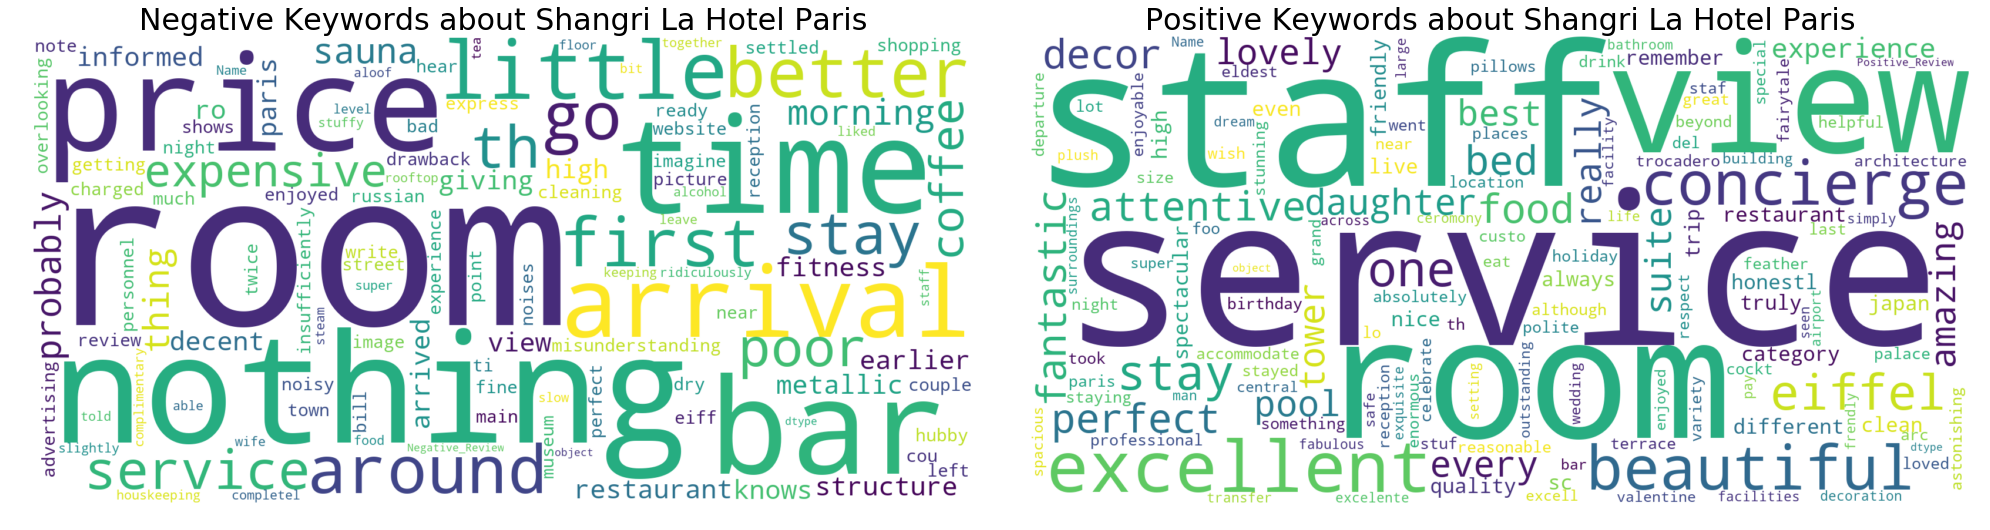

Top 5 Negative Words: [('room', 11), ('time', 6), ('paris', 5), ('price', 4), ('view', 4)]
Top 5 Positive Words: [('staff', 13), ('room', 12), ('view', 11), ('service', 8), ('stay', 7)]


In [25]:
wordcloud_hotel("Shangri La Hotel Paris", True)

In [22]:
hoteldf["Hotel_State"].unique()

array(['Netherlands', 'UK', 'France', 'Spain', 'Italy', 'Austria'],
      dtype=object)

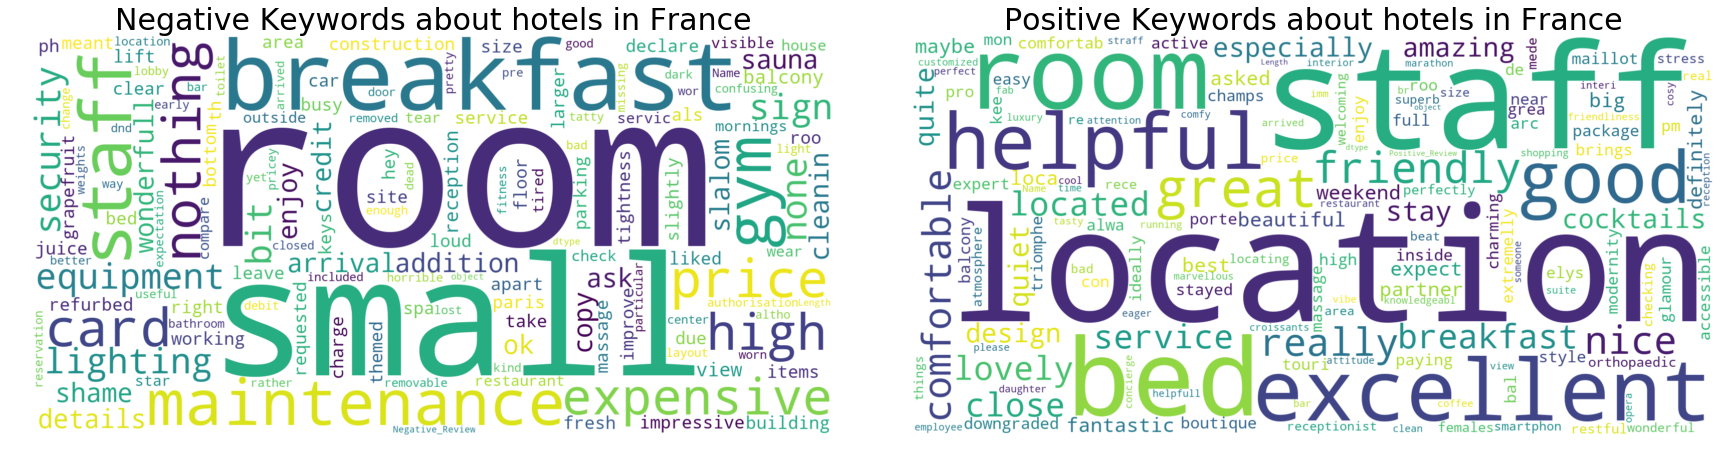

Top 5 Negative Words: [('room', 18828), ('small', 7820), ('breakfast', 6655), ('nothing', 4334), ('staff', 4009)]
Top 5 Positive Words: [('location', 26637), ('staff', 24279), ('room', 15904), ('great', 12795), ('good', 12216)]


In [23]:
wordcloud_state("France", True)

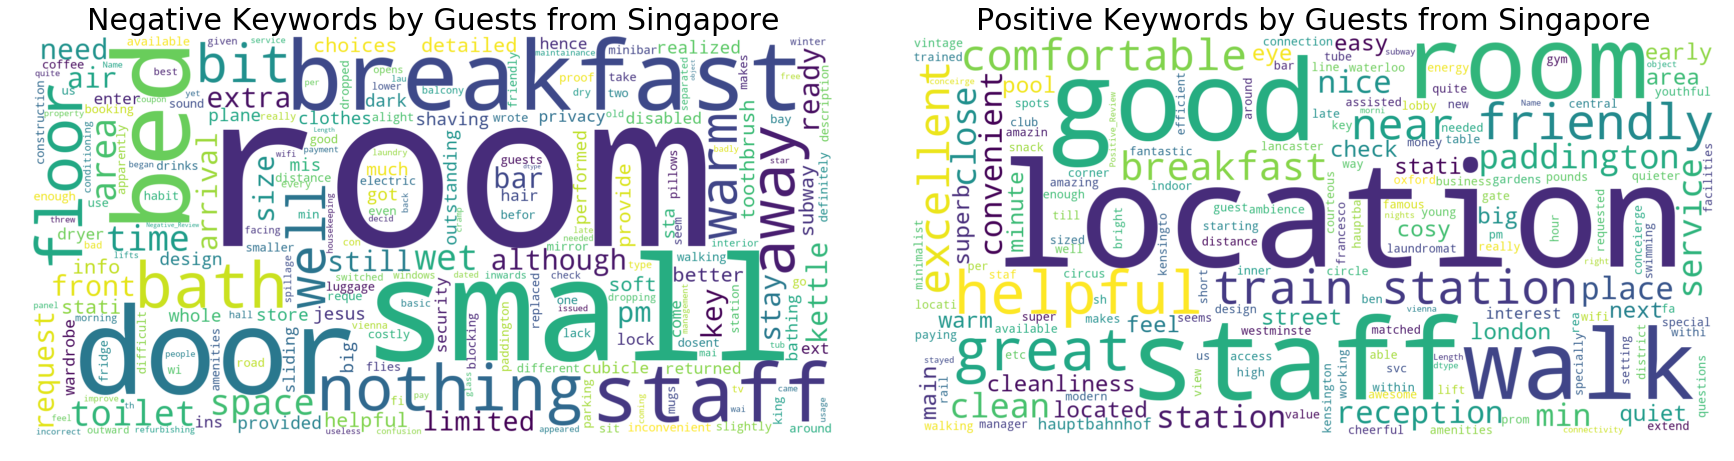

Top 7 Negative Words: [('room', 1170), ('staff', 346), ('small', 324), ('breakfast', 249), ('nothing', 211), ('one', 205), ('us', 191)]
Top 7 Positive Words: [('location', 1371), ('staff', 981), ('room', 895), ('good', 789), ('great', 553), ('friendly', 514), ('helpful', 494)]


In [27]:
wordcloud_origin("Singapore", True, 7)